In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("DS2_C5_S2_WeatherHistory_Data_Concept.csv")
df1=df.copy()

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.96,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.83,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.83,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
#can we predict temperature given humidity

In [6]:
x=df["Humidity"]
y=df['Temperature (C)']

Text(0, 0.5, 'Temp')

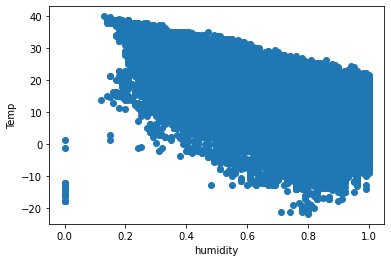

In [7]:
plt.scatter(x,y)
plt.xlabel("humidity")
plt.ylabel("Temp")

In [8]:
x.corr(y)

-0.6322527136083689

In [9]:
#since we are dealing with only 2 numerical no use of encoding

In [10]:
scale="minmax"

In [11]:
def feature_scale(scale):
    numerics=["int16","int32","int64","float16","float32","float64"]
    new_df=df.select_dtypes(include=numerics)
    if scale=="minmax":
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
    return df_scaled

In [13]:
df_s=feature_scale(scale)

In [15]:
df_s["Visibility (km)"].head()

0    0.983230
1    0.983230
2    0.929193
3    0.983230
4    0.983230
Name: Visibility (km), dtype: float64

In [16]:
df["Visibility (km)"].head()

0    15.83
1    15.83
2    14.96
3    15.83
4    15.83
Name: Visibility (km), dtype: float64

In [18]:
df["Visibility (km)"].min(),df["Visibility (km)"].max()

(0.0, 16.1)

In [19]:
15.83/16.1

0.9832298136645962

In [26]:
x=df["Humidity"]
y=df["Temperature (C)"]

In [27]:
x

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
96448    0.43
96449    0.48
96450    0.56
96451    0.60
96452    0.61
Name: Humidity, Length: 96453, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=30)

In [29]:
type(x_train)

pandas.core.series.Series

In [30]:
#training

In [31]:
#reshape if you have one feature using reshape
#-1 in row means unknown no of rows

In [32]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [33]:
model=LinearRegression().fit(x_train,y_train)

In [34]:
model

LinearRegression()

In [35]:
#coefficient_of_determination

In [36]:
coefficient_of_determination=model.score(x_train,y_train)

In [37]:
coefficient_of_determination

0.3977352606320298

In [38]:
#model parameters
#y intercept,slope

In [39]:
model.intercept_

array([34.61492371])

In [40]:
model.coef_

array([[-30.85172605]])

In [41]:
#evaluation
#here we are getting predicted value of model

In [42]:
y_predict=model.predict(x_test)

In [43]:
y_predict

array([[ 7.77392205],
       [15.48685356],
       [16.41240534],
       ...,
       [14.56130178],
       [ 9.93354287],
       [ 5.92281849]])

In [44]:
a=y_predict.flatten()

In [45]:
b=y_test.to_numpy()

In [46]:
a.shape

(28936,)

In [47]:
dataset = pd.DataFrame({'predict': a, 'actual': b}, columns=['predict', 'actual'])

In [48]:
dataset

,predict,actual
0,7.773922,1.05
1,15.486854,12.57
2,16.412405,9.31
3,15.178336,22.34
4,10.550577,-2.89
...,...,...
28931,9.007991,12.82
28932,15.178336,20.53
28933,14.561302,17.09
28934,9.933543,16.09


In [49]:
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
RMSE=mean_squared_error(y_test,y_predict,squared=False)

In [50]:
MSE,MAE,RMSE

(54.195413910383856, 6.007856176665762, 7.361753453517976)

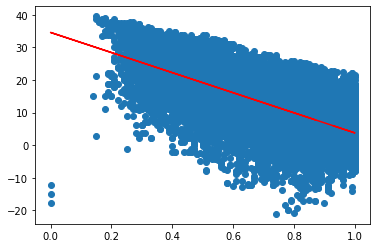

In [51]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color="red")

In [52]:
#y=mx+c
#temparature=humidity*(model.coef)_ + model.intercept_

# Multiple linear regression analysis

In [53]:
c=df1.corr()
c

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992628,-0.632253,0.008957,0.029988,0.392781,NaN,-0.005447
Apparent Temperature (C),0.992628,1.000000,-0.602570,-0.056649,0.029030,0.381658,NaN,-0.000218
Humidity,-0.632253,-0.602570,1.000000,-0.224951,0.000735,-0.369077,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056649,-0.224951,1.000000,0.103823,0.100745,NaN,-0.049260
Wind Bearing (degrees),0.029988,0.029030,0.000735,0.103823,1.000000,0.047614,NaN,-0.011651
Visibility (km),0.392781,0.381658,-0.369077,0.100745,0.047614,1.000000,NaN,0.059826
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000218,0.005454,-0.049260,-0.011651,0.059826,NaN,1.000000


<AxesSubplot:>

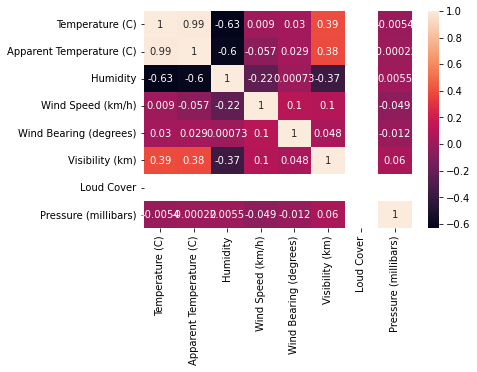

In [54]:
sb.heatmap(c,annot=True)

In [55]:
#target variable is temp
#with this humidity has high corr
#followed by visibility
#but visibility is also correlated with humidity
#so lets consider wind speed

In [56]:
for i in c:
    if i=="Temperature (C)":
        print(c[i].sort_values())

Humidity                   -0.632253
Pressure (millibars)       -0.005447
Wind Speed (km/h)           0.008957
Wind Bearing (degrees)      0.029988
Visibility (km)             0.392781
Apparent Temperature (C)    0.992628
Temperature (C)             1.000000
Loud Cover                       NaN
Name: Temperature (C), dtype: float64


In [57]:
df_s

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.506885,0.523561,0.89,0.221143,0.699164,0.983230,0.0,0.970135
1,0.505103,0.521175,0.86,0.223336,0.721448,0.983230,0.0,0.970613
2,0.505427,0.553236,0.89,0.061551,0.568245,0.929193,0.0,0.970909
3,0.487769,0.501939,0.83,0.220830,0.749304,0.983230,0.0,0.971358
4,0.495383,0.517447,0.83,0.172905,0.721448,0.983230,0.0,0.971454
...,...,...,...,...,...,...,...,...
96448,0.774988,0.801372,0.43,0.172279,0.086351,1.000000,0.0,0.969399
96449,0.751660,0.779899,0.48,0.158027,0.055710,0.965839,0.0,0.970164
96450,0.710514,0.742022,0.56,0.140642,0.083565,1.000000,0.0,0.970642
96451,0.702090,0.734268,0.60,0.164918,0.055710,1.000000,0.0,0.970919


In [58]:
x = df_s[['Humidity', 'Wind Speed (km/h)']].values.reshape(-1,2)
y =df_s['Temperature (C)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

In [59]:
model=LinearRegression().fit(x_train,y_train)

In [60]:
coefficient_of_determination=model.score(x_train,y_train)

In [61]:
coefficient_of_determination

0.4165873962394633

In [62]:
model.intercept_,model.coef_

(0.9655724083920663, array([-0.52427616, -0.19917343]))

In [63]:
y_predict=model.predict(x_test)
y_predict

array([0.51637431, 0.50160651, 0.61234651, ..., 0.57336785, 0.50897046,
       0.50125684])

In [64]:
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
RMSE=mean_squared_error(y_test,y_predict,squared=False)

In [65]:
MSE,MAE,RMSE

(0.013796462504235572, 0.09524522326016902, 0.11745834369782154)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test,y_predict)

0.4227903668330312

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
from sklearn.linear_model import Ridge

## Polynomial Regression:

In [6]:
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

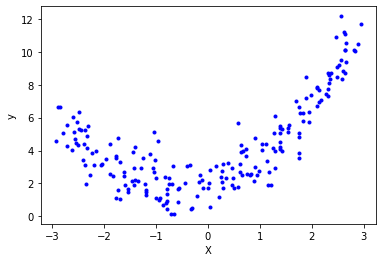

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [7]:
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)



0.20640953452487742

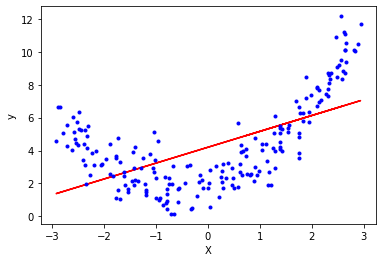

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8484517930747234

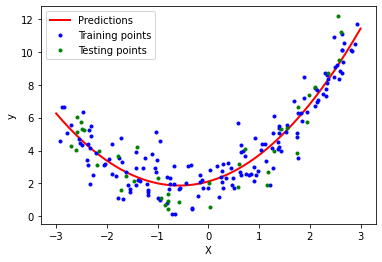

In [12]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()